In [16]:
import cv2

import pytesseract
import numpy as np
import matplotlib.pyplot as plt

In [4]:
url='http://192.168.1.51:8080/cam.mjpg'

In [20]:
url='http://192.168.1.248:8080/cam.mjpg'

In [117]:
cap = cv2.VideoCapture(url)

ret, frame = cap.read()
print ("found frame")
#cv2.imshow('Video', frame)
print ("done")

found frame
done


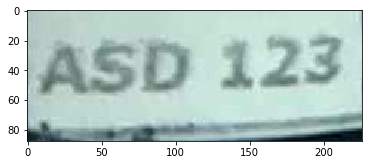

In [118]:
plt.imshow(frame)
plt.show()

In [119]:
config = ('--oem 1 --psm 13')
# pytessercat
text = pytesseract.image_to_string(frame, config=config)

print(text)

ASD 123



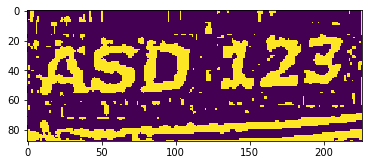

‘ASD 123



In [133]:
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
#gray, img_bin = cv2.threshold(gray,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_bin = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
gray = cv2.bitwise_not(img_bin)
kernel = np.ones((3, 3), np.uint8)
img = gray
img = cv2.erode(gray, kernel, iterations=1)
img = cv2.dilate(img, kernel, iterations=1)
plt.imshow(gray)
plt.show()
config = ('--oem 1 --psm 13')
out_below = pytesseract.image_to_string(gray,config=config)
print(out_below)

In [ ]:

cap.release()